# STOCK ANALYSIS (TATAMOTORS)

In [1]:
###Required Packages and Libraries

In [28]:
import yfinance as yf
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse


In [3]:
##Connecting to Yahoo Finance API

url = "https://yh-finance.p.rapidapi.com/auto-complete"

querystring = {"q":"TATAMOTORS.NS","region":"India"}

headers = {
	"X-RapidAPI-Key": "58b68b1204mshf9dc83516db66c7p182173jsn42a87c913b7f",
	"X-RapidAPI-Host": "yh-finance.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"explains":[],"count":9,"quotes":[{"exchange":"NSI","shortname":"TATA MOTORS LTD.","quoteType":"EQUITY","symbol":"TATAMOTORS.NS","index":"quotes","score":2086900.0,"typeDisp":"Equity","longname":"Tata Motors Limited","exchDisp":"NSE","sector":"Consumer Cyclical","industry":"Auto Manufacturers","isYahooFinance":true}],"news":[{"uuid":"31b1ad4b-912a-3676-b8a4-83e3ae512a61","title":"Pike Corporation Announces Promotion of Two Region Vice Presidents Reflecting Business Growth Across Its National Footprint","publisher":"Business Wire","link":"https://finance.yahoo.com/news/pike-corporation-announces-promotion-two-170600749.html","providerPublishTime":1673975160,"type":"STORY","thumbnail":{"resolutions":[{"url":"https://s.yimg.com/uu/api/res/1.2/_HlXdSrhSWoSzC2yNSiu5Q--~B/aD0zMDA7dz0zMDA7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/business-wire.com/822ddee2f56d26e7401924bc53ae201e","width":300,"height":300,"tag":"original"},{"url":"https://s.yimg.com/uu/api/res/1.2/GHfaBx3T2f6.W.rdcdeE_

In [4]:
TM= yf.Ticker("TATAMOTORS.NS")


# show dividends
TM.dividends

# show splits
TM.splits


Date
2011-09-12 00:00:00+05:30    5.0
Name: Stock Splits, dtype: float64

In [5]:
df = yf.download("TATAMOTORS.NS", start="2020-01-01",parse_dates=['Date'],index_col='Date')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,185.149994,186.699997,183.600006,184.449997,184.449997,25968357
2020-01-02,185.000000,194.699997,184.600006,193.750000,193.750000,57289863
2020-01-03,192.899994,195.649994,189.250000,191.100006,191.100006,47572728
2020-01-06,191.000000,191.000000,185.050003,185.649994,185.649994,28621212
2020-01-07,187.000000,189.399994,182.300003,184.699997,184.699997,34995035
...,...,...,...,...,...,...
2023-01-11,415.750000,420.000000,413.549988,418.200012,418.200012,22224361
2023-01-12,420.299988,420.500000,410.049988,412.250000,412.250000,12479034
2023-01-13,413.000000,416.350006,408.000000,411.500000,411.500000,10449630


In [6]:
import plotly
import pandas as pd
import numpy as np


<AxesSubplot:xlabel='Date'>

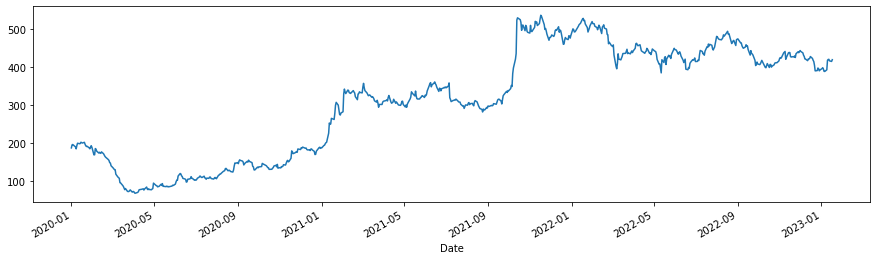

In [10]:
df['High'].plot(figsize=(15,4),xlabel='Date')

<AxesSubplot:xlabel='Date'>

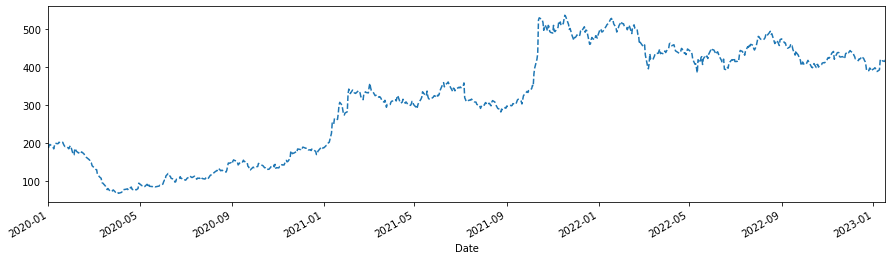

In [22]:
##Limiting range on x-axis
df['High'].plot(xlim=['2020-01-01','2023-01-17'],figsize=(15,4),ls='--')

In [27]:
###Getting Open price
Stock_open =df.loc['2020-01-01':'2023-01-17']['Open']
Stock_open

Date
2020-01-01    185.149994
2020-01-02    185.000000
2020-01-03    192.899994
2020-01-06    191.000000
2020-01-07    187.000000
                 ...    
2023-01-11    415.750000
2023-01-12    420.299988
2023-01-13    413.000000
2023-01-16    413.500000
2023-01-17    413.000000
Name: Open, Length: 759, dtype: float64

<AxesSubplot:xlabel='Date'>

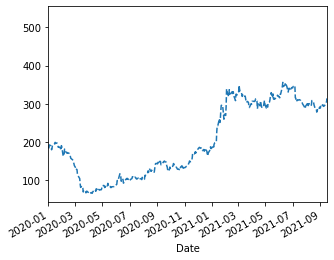

In [31]:
df['Open'].plot(xlim=['2020-01-01','2021-09-17'],figsize=(5,4),ls='--')

#### Working with date time

In [57]:
df.set_index(keys='Date',inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 759 entries, 2020-01-01 to 2023-01-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       759 non-null    float64
 1   High       759 non-null    float64
 2   Low        759 non-null    float64
 3   Close      759 non-null    float64
 4   Adj Close  759 non-null    float64
 5   Volume     759 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.5 KB


####    Time Resampling

<AxesSubplot:xlabel='Date'>

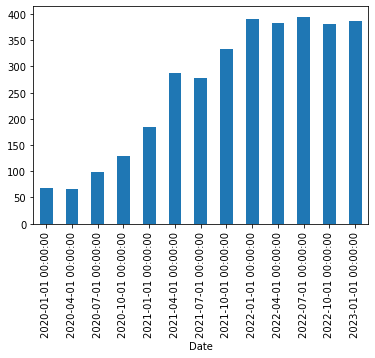

In [80]:

df.resample(rule='QS').min()['Open'].plot(kind='bar')

In [84]:
df['30 days moving average']=df['Open'].rolling(11).mean()

In [91]:
df['30 days moving average'].head(12)

Date
2020-01-01           NaN
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
2020-01-09           NaN
2020-01-10           NaN
2020-01-13           NaN
2020-01-14           NaN
2020-01-15    189.413635
2020-01-16    190.718181
Name: 30 days moving average, dtype: float64

<AxesSubplot:xlabel='Date'>

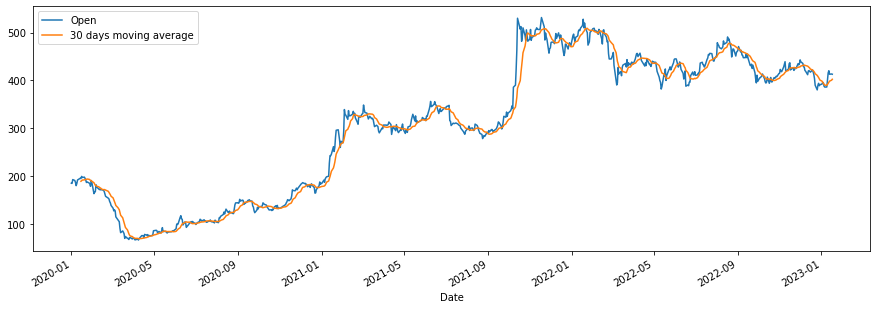

In [92]:
df[['Open','30 days moving average']].plot(figsize=(15,5))